In [2]:
import os, gensim

def iter_documents(top_directory):
    """Iterate over all documents, yielding a document (=list of utf8 tokens) at a time."""
    for root, dirs, files in os.walk(top_directory):
        for file in filter(lambda file: file.endswith('.txt'), files):
            document = open(os.path.join(root, file), encoding='utf8').read() # read the entire document, as one big string
            yield gensim.utils.tokenize(document, lower=True) # or whatever tokenization suits you

class MyCorpus(object):
    def __init__(self, top_dir):
        self.top_dir = top_dir
        self.dictionary = gensim.corpora.Dictionary(iter_documents(top_dir))
        self.dictionary.filter_extremes(no_below=1, keep_n=30000) # check API docs for pruning params

    def __iter__(self):
        for tokens in iter_documents(self.top_dir):
            yield self.dictionary.doc2bow(tokens)

            


In [3]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np
import glob

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def get_topics(folder, num_topics, show_top):
    corpus = MyCorpus(folder) # create a dictionary
    
    os.environ['DTM_PATH'] = r"dtm-win64.exe"

    if not os.environ.get('DTM_PATH', None):
        raise ValueError("SKIP: You need to set the DTM path")
        
    time_seq = []

    for year in range(2010, 2020):
        docs_num = len(glob.glob(folder + "\\" + str(year) + "*"))
        print(f"Year {year} has {docs_num} documents")
        time_seq.append(docs_num)
        
    dtm_path = os.environ['DTM_PATH']
    
    model = DtmModel(dtm_path, corpus, time_seq, num_topics=num_topics,
                 id2word=corpus.dictionary, initialize_lda=True)
    
    topic_list = []

    for id in range(num_topics):
        topic = [model.show_topic(topicid=id, time=time, topn=show_top) for time in range(len(time_seq))]
        topic_list.append(topic)
        
    x = range(2010,2010+len(time_seq))

    for index, topic in enumerate(topic_list):
        plt.title("Topic " + str(index+1))

        for word in range(show_top):
            prob = [sub[word] for sub in topic]
            values = [probability[0] for probability in prob]
            plt.plot(x, values, label = prob[0][1])

        plt.xticks(np.arange(2010, 2020, step = 1))
        plt.ylabel("Word Distribution")
        plt.xlabel("Year")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        plt.show()
        
    for topic in range(num_topics):
        print(f'Topic {topic}')
        print(model.print_topics()[topic])
        print()
        
    return(model)

Year 2010 has 11 documents
Year 2011 has 13 documents
Year 2012 has 16 documents
Year 2013 has 10 documents
Year 2014 has 16 documents
Year 2015 has 11 documents
Year 2016 has 13 documents
Year 2017 has 17 documents
Year 2018 has 15 documents
Year 2019 has 15 documents


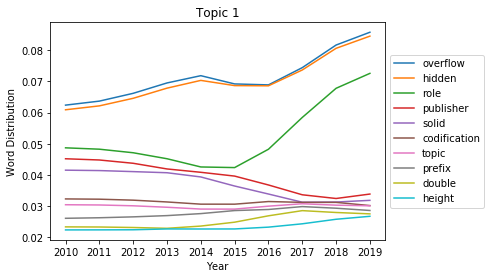

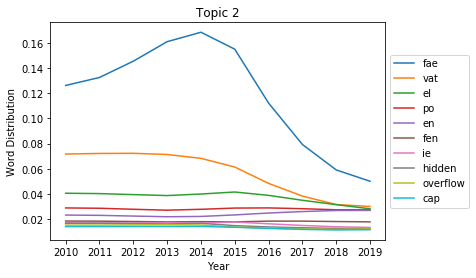

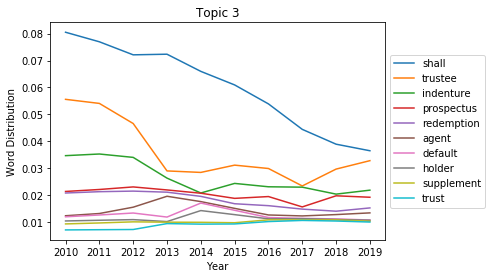

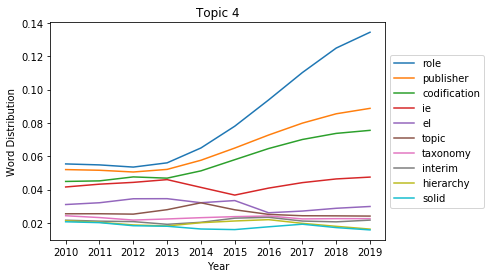

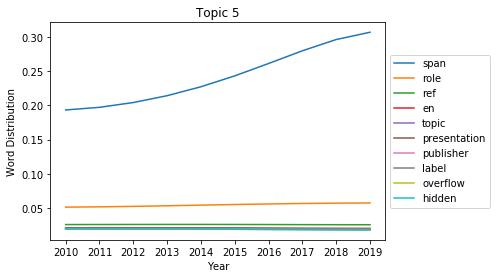

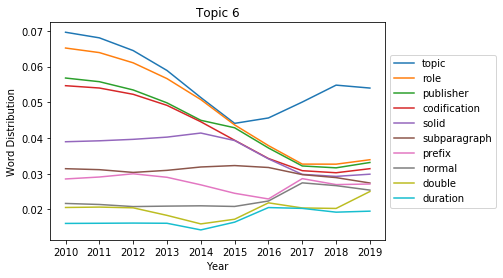

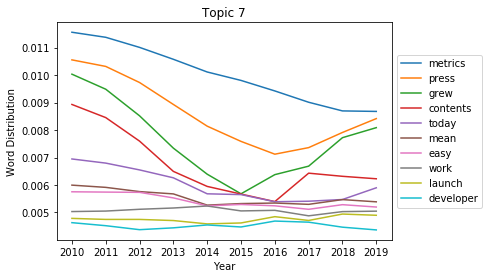

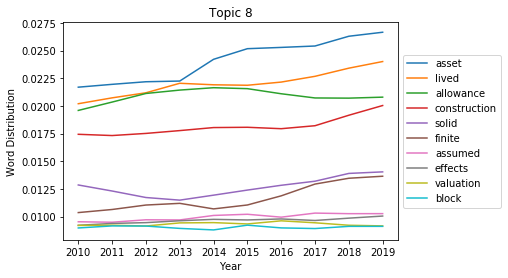

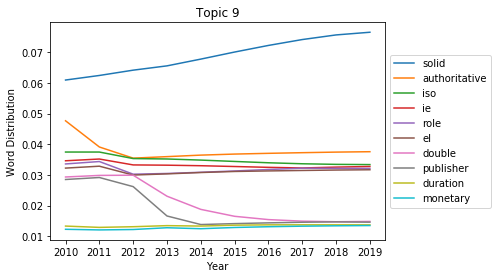

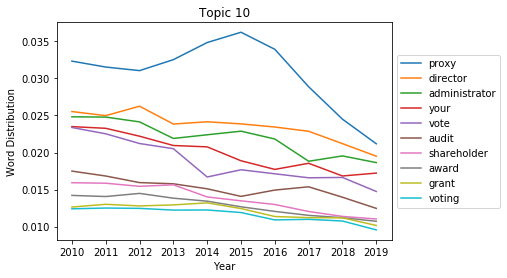

Topic 0
0.062*overflow + 0.061*hidden + 0.049*role + 0.045*publisher + 0.042*solid + 0.032*codification + 0.030*topic + 0.026*prefix + 0.023*double + 0.022*height

Topic 1
0.126*fae + 0.072*vat + 0.041*el + 0.029*po + 0.023*en + 0.018*fen + 0.017*ie + 0.017*hidden + 0.015*overflow + 0.014*cap

Topic 2
0.081*shall + 0.056*trustee + 0.035*indenture + 0.021*prospectus + 0.021*redemption + 0.012*agent + 0.012*default + 0.010*holder + 0.009*supplement + 0.007*trust

Topic 3
0.055*role + 0.052*publisher + 0.045*codification + 0.042*ie + 0.031*el + 0.026*topic + 0.024*taxonomy + 0.022*interim + 0.021*hierarchy + 0.021*solid

Topic 4
0.193*span + 0.052*role + 0.026*ref + 0.022*en + 0.021*topic + 0.021*presentation + 0.020*publisher + 0.020*label + 0.020*overflow + 0.020*hidden

Topic 5
0.070*topic + 0.065*role + 0.057*publisher + 0.055*codification + 0.039*solid + 0.031*subparagraph + 0.029*prefix + 0.022*normal + 0.021*double + 0.016*duration

Topic 6
0.012*metrics + 0.011*press + 0.010*grew 

In [4]:
lda_amazon = get_topics('AMZN_XML', num_topics = 10, show_top = 10)

Year 2010 has 9 documents
Year 2011 has 7 documents
Year 2012 has 14 documents
Year 2013 has 8 documents
Year 2014 has 9 documents
Year 2015 has 14 documents
Year 2016 has 9 documents
Year 2017 has 12 documents
Year 2018 has 7 documents
Year 2019 has 18 documents


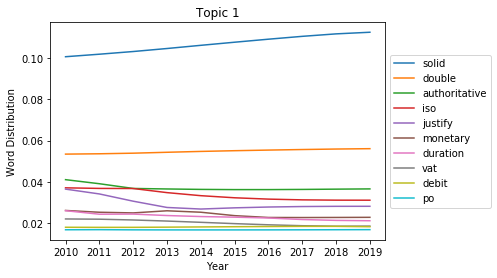

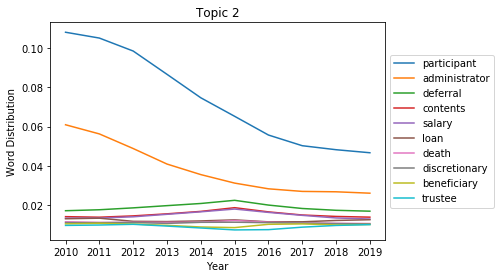

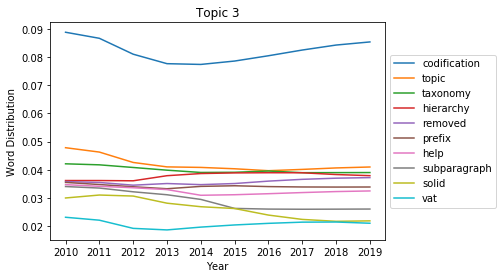

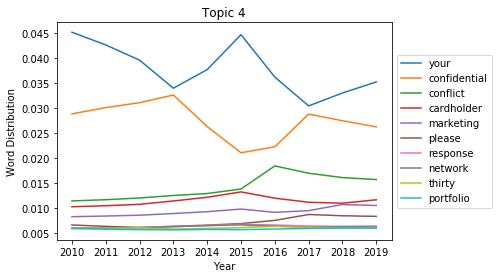

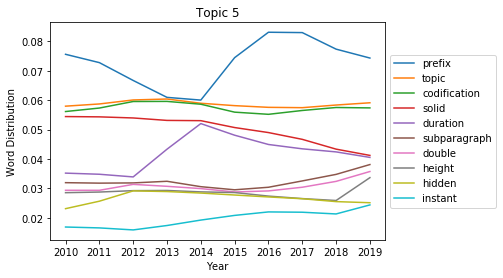

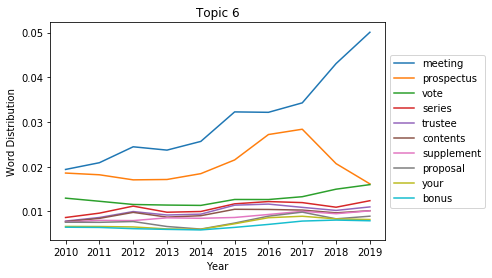

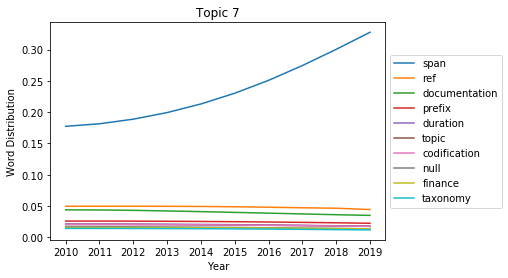

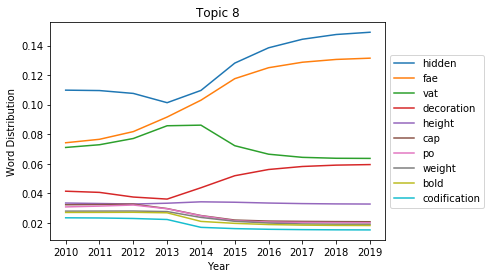

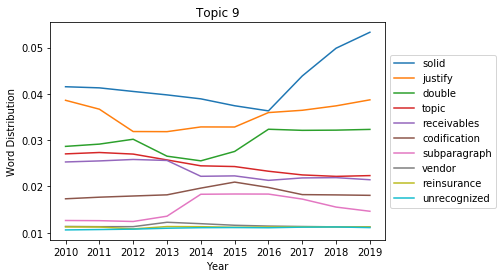

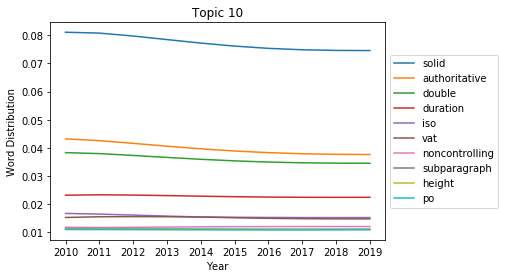

Topic 0
0.101*solid + 0.053*double + 0.041*authoritative + 0.037*iso + 0.036*justify + 0.026*monetary + 0.026*duration + 0.022*vat + 0.018*debit + 0.017*po

Topic 1
0.108*participant + 0.061*administrator + 0.017*deferral + 0.014*contents + 0.013*salary + 0.013*loan + 0.012*death + 0.011*discretionary + 0.011*beneficiary + 0.010*trustee

Topic 2
0.089*codification + 0.048*topic + 0.042*taxonomy + 0.036*hierarchy + 0.036*removed + 0.036*prefix + 0.035*help + 0.034*subparagraph + 0.030*solid + 0.023*vat

Topic 3
0.045*your + 0.029*confidential + 0.011*conflict + 0.010*cardholder + 0.008*marketing + 0.007*please + 0.006*response + 0.006*network + 0.006*thirty + 0.006*portfolio

Topic 4
0.076*prefix + 0.058*topic + 0.056*codification + 0.054*solid + 0.035*duration + 0.032*subparagraph + 0.029*double + 0.029*height + 0.023*hidden + 0.017*instant

Topic 5
0.019*meeting + 0.019*prospectus + 0.013*vote + 0.009*series + 0.008*trustee + 0.008*contents + 0.008*supplement + 0.008*proposal + 0.007*

In [5]:
lda_costco = get_topics('COST_XML', num_topics = 10, show_top = 10)

Year 2010 has 20 documents
Year 2011 has 15 documents
Year 2012 has 23 documents
Year 2013 has 20 documents
Year 2014 has 26 documents
Year 2015 has 19 documents
Year 2016 has 19 documents
Year 2017 has 22 documents
Year 2018 has 17 documents
Year 2019 has 25 documents


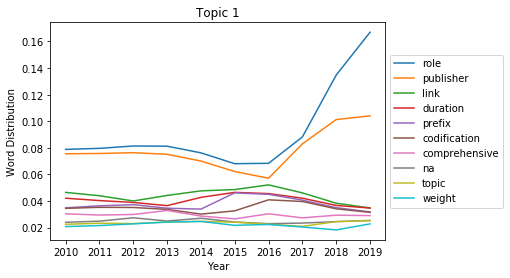

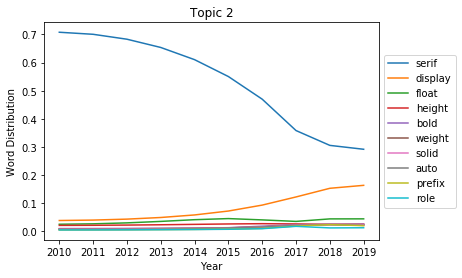

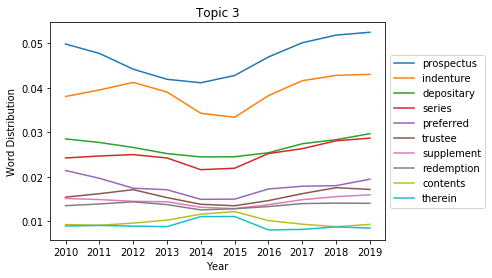

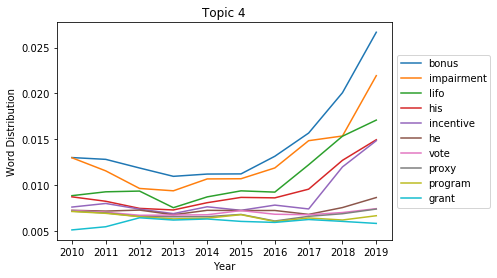

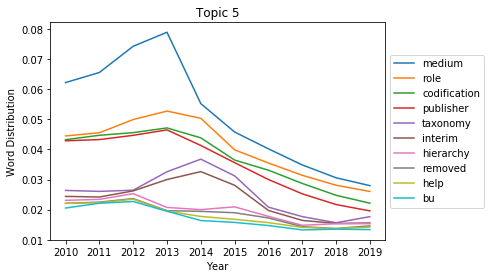

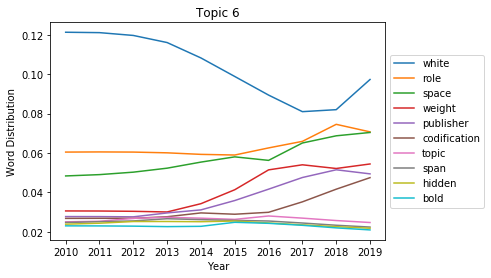

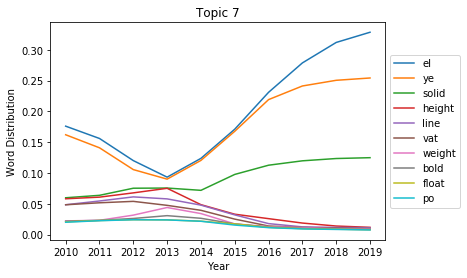

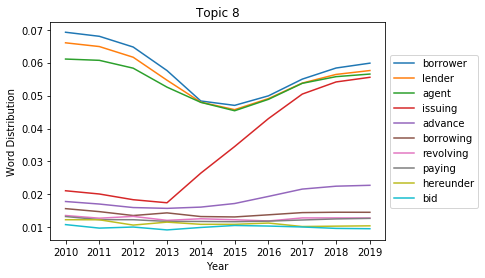

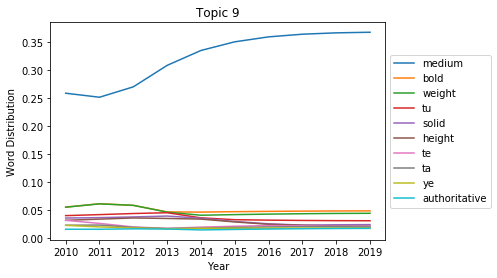

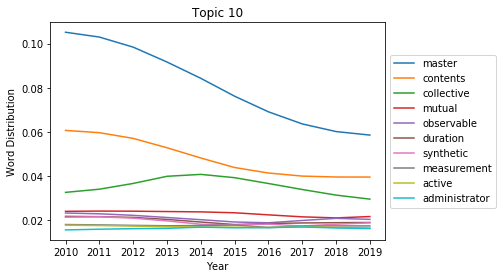

Topic 0
0.079*role + 0.076*publisher + 0.046*link + 0.042*duration + 0.035*prefix + 0.034*codification + 0.030*comprehensive + 0.024*na + 0.023*topic + 0.021*weight

Topic 1
0.708*serif + 0.038*display + 0.024*float + 0.020*height + 0.009*bold + 0.008*weight + 0.007*solid + 0.005*auto + 0.004*prefix + 0.004*role

Topic 2
0.050*prospectus + 0.038*indenture + 0.029*depositary + 0.024*series + 0.021*preferred + 0.015*trustee + 0.015*supplement + 0.014*redemption + 0.009*contents + 0.009*therein

Topic 3
0.013*bonus + 0.013*impairment + 0.009*lifo + 0.009*his + 0.008*incentive + 0.007*he + 0.007*vote + 0.007*proxy + 0.007*program + 0.005*grant

Topic 4
0.062*medium + 0.044*role + 0.043*codification + 0.043*publisher + 0.026*taxonomy + 0.024*interim + 0.023*hierarchy + 0.022*removed + 0.022*help + 0.021*bu

Topic 5
0.121*white + 0.060*role + 0.048*space + 0.031*weight + 0.028*publisher + 0.027*codification + 0.025*topic + 0.025*span + 0.024*hidden + 0.023*bold

Topic 6
0.176*el + 0.162*ye +

In [6]:
lda_kroger = get_topics('KR_XML', num_topics = 10, show_top = 10)

Year 2010 has 21 documents
Year 2011 has 15 documents
Year 2012 has 21 documents
Year 2013 has 14 documents
Year 2014 has 18 documents
Year 2015 has 18 documents
Year 2016 has 19 documents
Year 2017 has 15 documents
Year 2018 has 12 documents
Year 2019 has 15 documents


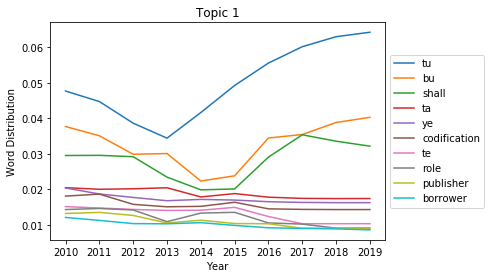

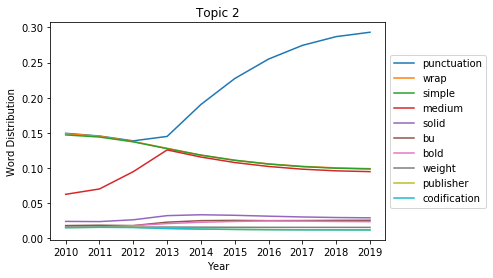

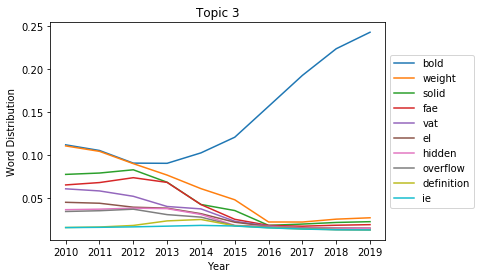

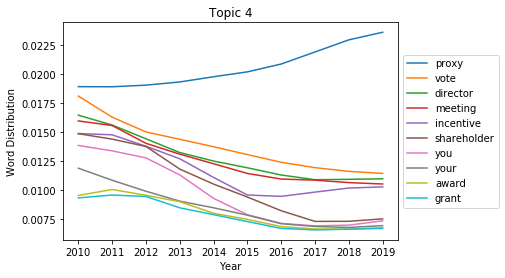

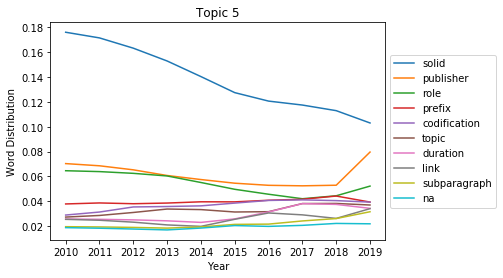

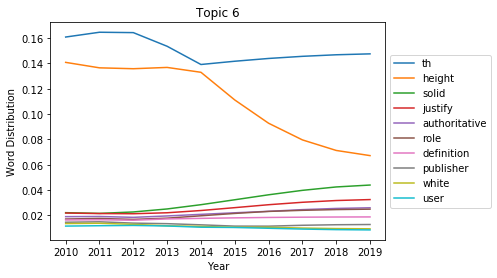

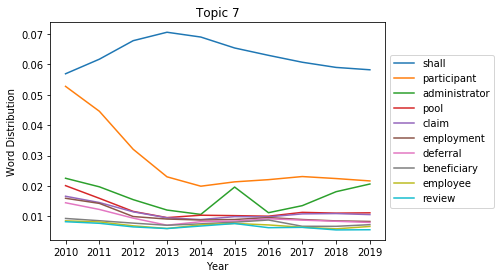

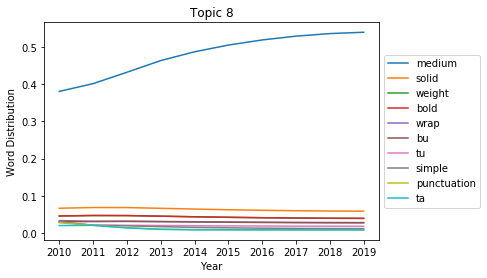

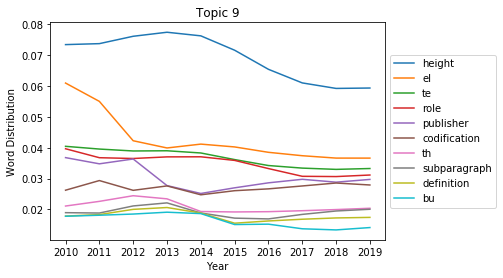

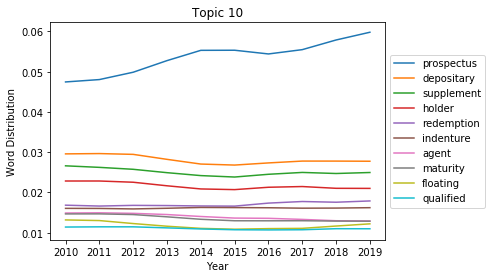

Topic 0
0.048*tu + 0.038*bu + 0.030*shall + 0.021*ta + 0.020*ye + 0.018*codification + 0.015*te + 0.014*role + 0.013*publisher + 0.012*borrower

Topic 1
0.149*punctuation + 0.149*wrap + 0.147*simple + 0.062*medium + 0.024*solid + 0.018*bu + 0.016*bold + 0.016*weight + 0.015*publisher + 0.015*codification

Topic 2
0.112*bold + 0.110*weight + 0.077*solid + 0.065*fae + 0.061*vat + 0.045*el + 0.036*hidden + 0.034*overflow + 0.015*definition + 0.015*ie

Topic 3
0.019*proxy + 0.018*vote + 0.016*director + 0.016*meeting + 0.015*incentive + 0.015*shareholder + 0.014*you + 0.012*your + 0.010*award + 0.009*grant

Topic 4
0.176*solid + 0.070*publisher + 0.065*role + 0.038*prefix + 0.029*codification + 0.027*topic + 0.026*duration + 0.025*link + 0.019*subparagraph + 0.019*na

Topic 5
0.161*th + 0.141*height + 0.022*solid + 0.022*justify + 0.019*authoritative + 0.017*role + 0.016*definition + 0.015*publisher + 0.014*white + 0.012*user

Topic 6
0.057*shall + 0.053*participant + 0.023*administrator +

In [7]:
lda_target = get_topics('TGT_XML', num_topics = 10, show_top = 10)

Year 2010 has 24 documents
Year 2011 has 20 documents
Year 2012 has 13 documents
Year 2013 has 20 documents
Year 2014 has 27 documents
Year 2015 has 15 documents
Year 2016 has 16 documents
Year 2017 has 27 documents
Year 2018 has 26 documents
Year 2019 has 26 documents


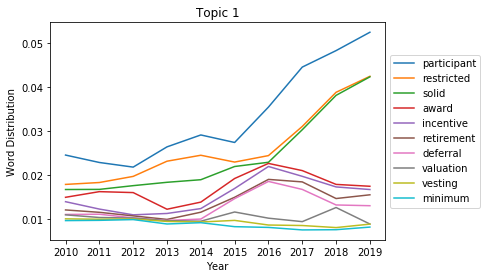

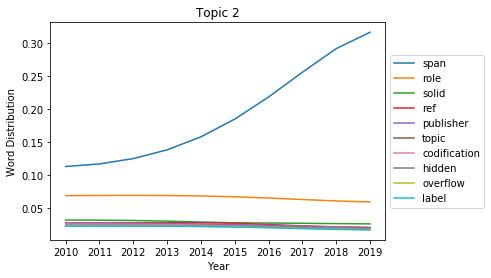

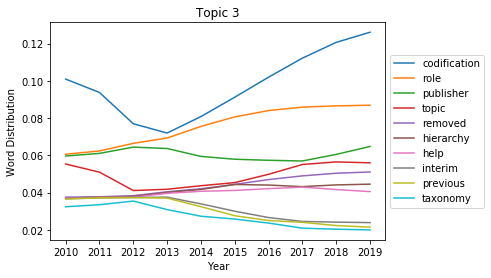

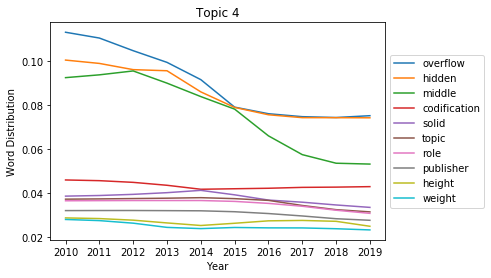

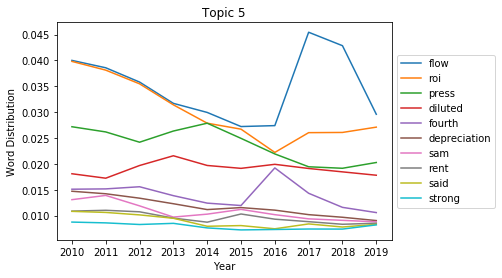

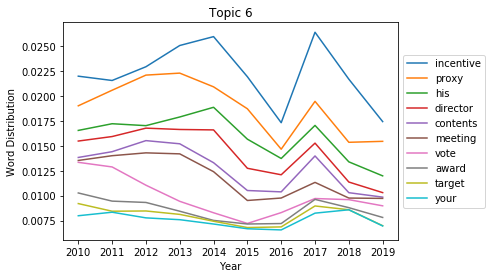

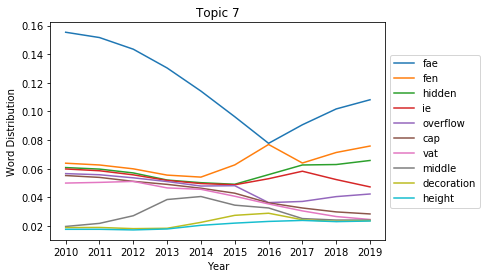

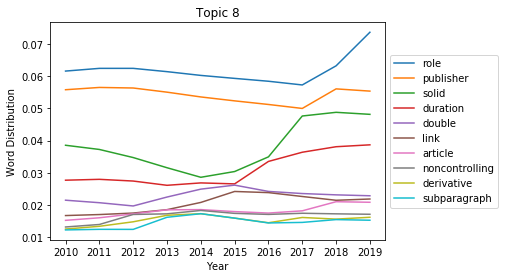

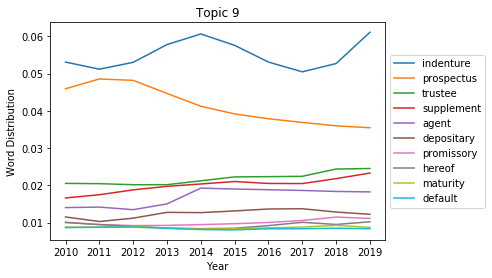

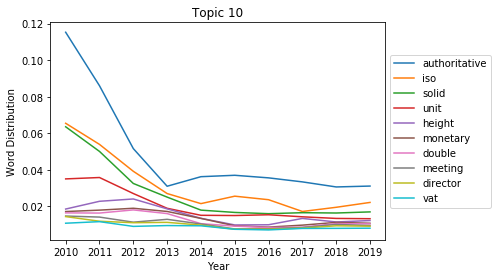

Topic 0
0.025*participant + 0.018*restricted + 0.017*solid + 0.015*award + 0.014*incentive + 0.012*retirement + 0.011*deferral + 0.011*valuation + 0.010*vesting + 0.010*minimum

Topic 1
0.113*span + 0.069*role + 0.032*solid + 0.027*ref + 0.027*publisher + 0.026*topic + 0.026*codification + 0.024*hidden + 0.023*overflow + 0.023*label

Topic 2
0.101*codification + 0.061*role + 0.060*publisher + 0.055*topic + 0.038*removed + 0.037*hierarchy + 0.037*help + 0.037*interim + 0.037*previous + 0.032*taxonomy

Topic 3
0.113*overflow + 0.101*hidden + 0.093*middle + 0.046*codification + 0.039*solid + 0.037*topic + 0.037*role + 0.032*publisher + 0.029*height + 0.028*weight

Topic 4
0.040*flow + 0.040*roi + 0.027*press + 0.018*diluted + 0.015*fourth + 0.015*depreciation + 0.013*sam + 0.011*rent + 0.011*said + 0.009*strong

Topic 5
0.022*incentive + 0.019*proxy + 0.017*his + 0.015*director + 0.014*contents + 0.014*meeting + 0.013*vote + 0.010*award + 0.009*target + 0.008*your

Topic 6
0.155*fae + 0.0

In [8]:
lda_walmart = get_topics('WMT_XML', num_topics = 10, show_top = 10)